# An Analysis of NASA Asteroids dataset

## Data Preparation/Inspection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
nasa_df = pd.read_csv (r'nasa.csv')
nasa_df.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,2306383,2306383,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


In [2]:
print(nasa_df.shape)
nasa_df.describe()

(4687, 40)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


* Dataset includes 4687 observations and 40 columns.
* The mean values of each column are less than their median values.
* There are large differences between the values of 75% quantile and maximum in several columns: 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', and etc.
* There is a reasonable doubt that some values are outliers.

* The dataset includes the information about the geometry of the asteroid and its path and speed.

In [3]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

* Dataset has 4 types of data; 1 boolean, 30 float, 5 integer, and 4 object values.
* None of the variables has missing values.

In [4]:
nasa_df.Hazardous.unique()  

array([ True, False])

In [5]:
nasa_df.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

* The target/dependent variable, 'Hazardous', is a boolean variable.
* There are 3932 observations considered as not hazardous and 755 of the observations are harzardous.

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hazardous', ylabel='count'>

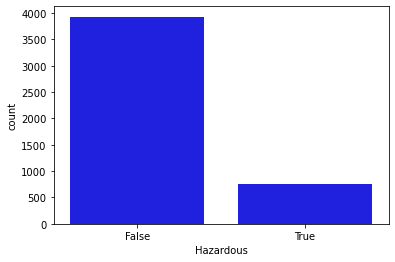

In [6]:
#Counts of hazardous vs not-hazardous  (seems to be more non-hazardous than hazardous) 

sns.countplot(nasa_df['Hazardous'], color = 'blue')

False : $\frac{3932}{4687}$ = 83.9%\
True : $\frac{755}{4687}$ = 16.1%

In [7]:
nasa_df.corr()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Name,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Absolute Magnitude,0.602381,0.602381,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424


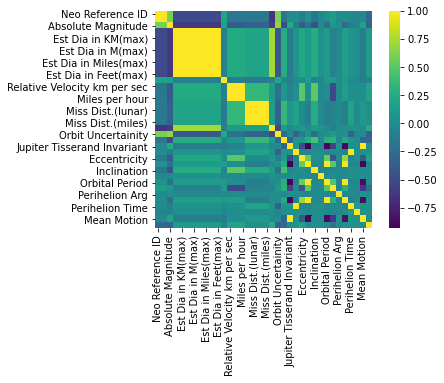

<Figure size 2160x6480 with 0 Axes>

In [8]:
sns.heatmap(nasa_df.corr(), vmax = 1, square = True, cmap = 'viridis')
fig=plt.figure(figsize=(30, 90))
plt.show()

* Light shades represents positive correlation while darker shades reppresents negative correlation.


In [9]:
#cleaning our data (drop repetitive columns keep miles, Est Dia in KM(min)'.
#keep 'Relative Velocity mile per hr','Miss Dist.(miles),'Relative Velocity km per hr'
nasa_df = nasa_df.drop(columns=['Miss Dist.(kilometers)','Miss Dist.(kilometers)','Miss Dist.(lunar)','Miss Dist.(Astronomical)', 'Est Dia in Feet(max)','Est Dia in Feet(min)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in KM(max)','Est Dia in KM(min)','Relative Velocity km per sec','Relative Velocity km per hr'])

In [10]:
#corelation of independent variables with the dependent variable
#want to check which characteristics associated with asteroid being hazardous
nasa_df.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False)


#We can filter groupby hazardous later and just get the true 

,Hazardous
Hazardous,1.000000
Orbit ID,0.247369
Miles per hour,0.191970
Eccentricity,0.183269
Est Dia in Miles(max),0.132424
Est Dia in Miles(min),0.132424
Mean Anomaly,0.054164
Epoch Osculation,0.040940
Aphelion Dist,0.040800
Perihelion Time,0.038113


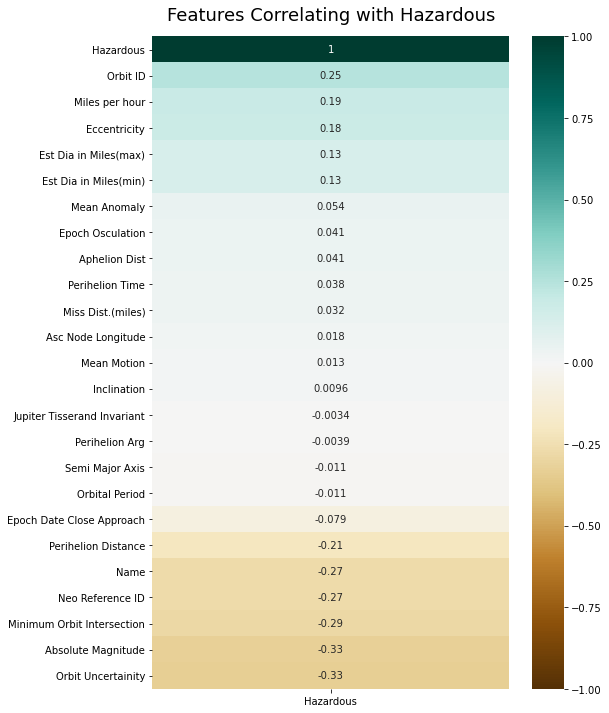

In [11]:
#New Heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(nasa_df.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Hazardous', fontdict={'fontsize':18}, pad=16);

* 'Inclination', 'Jupiter Tisserand Invariant', and 'Perihelion Arg' have almost no correlation with 'Hazardous'.
* There is no linear relationship between these three predictors so it is safe to drop them.

In [12]:
nasa_df = nasa_df.drop(columns=['Inclination','Jupiter Tisserand Invariant','Perihelion Arg'])
nasa_df.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False)

,Hazardous
Hazardous,1.000000
Orbit ID,0.247369
Miles per hour,0.191970
Eccentricity,0.183269
Est Dia in Miles(max),0.132424
Est Dia in Miles(min),0.132424
Mean Anomaly,0.054164
Epoch Osculation,0.040940
Aphelion Dist,0.040800
Perihelion Time,0.038113


<AxesSubplot:>

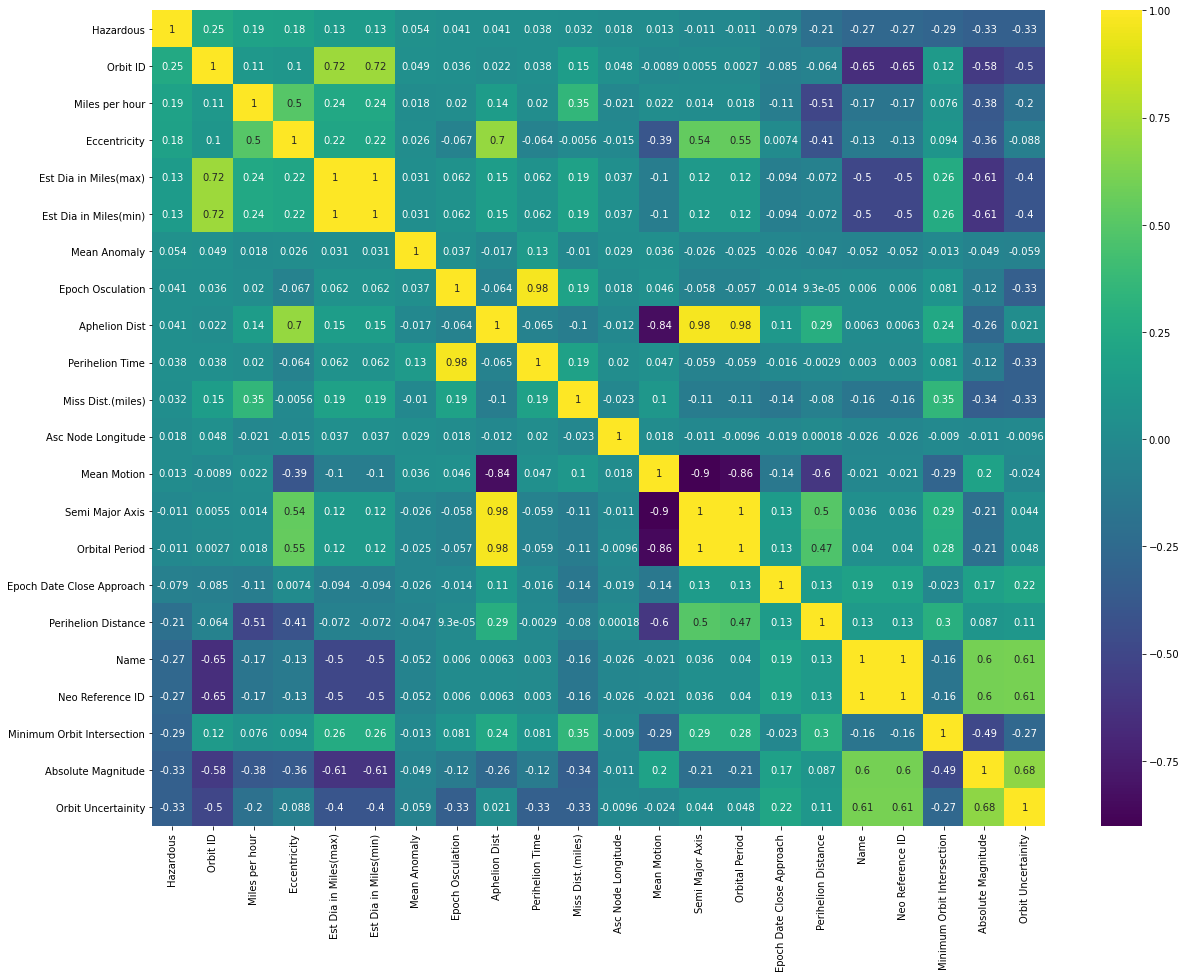

In [13]:
#Harzardous correlation matrix
k = 22 #number of variables for heatmap
cols = nasa_df.corr().nlargest(k, 'Hazardous')['Hazardous'].index
cm = nasa_df[cols].corr()
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, cmap = 'viridis')

* 'Orbit ID' has strong postive correlation with 'Est Dia in Miles(max)' and 'Est Dia in Miles(min)'.
* 'Epoch Osculation' has really strong postive correlation with 'Perihelion Time'.
* 'Aphelion Dist' has strong positive correlation with 'Eccentricity', 'Semi Major Axis', and 'Orbital Period' whearas it has strong negative correlation with 'Mean Motion'.
* 'Mean Motion' also has strong negative correlation with 'Semi Major Axis', and 'Orbital Period' which are positively correlated with 'Aphelion Dist'.

In [14]:
# only consider the columns that have numerical values
# in order to create the box plot and check the outliers
nasa_df_num = nasa_df.drop(columns=['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox','Hazardous'])

In [15]:
nasa_df_num 

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Orbit ID,Orbit Uncertainity,...,Epoch Osculation,Eccentricity,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.600,0.079051,0.176763,788947200000,13680.509944,3.899334e+07,17,5,...,2458000.5,0.425549,1.407011,314.373913,609.599786,0.808259,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.300,0.090762,0.202951,788947200000,40519.173105,3.560342e+07,21,3,...,2458000.5,0.351674,1.107776,136.717242,425.869294,0.718200,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.300,0.143849,0.321655,789552000000,16979.661798,4.736658e+06,22,0,...,2458000.5,0.348248,1.458824,259.475979,643.580228,0.950791,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.400,0.005469,0.012229,790156800000,24994.839864,2.652237e+07,7,6,...,2458000.5,0.216578,1.255903,57.173266,514.082140,0.983902,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.600,0.079051,0.176763,790156800000,22012.954985,3.791037e+07,25,1,...,2458000.5,0.210448,1.225615,84.629307,495.597821,0.967687,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.027410,0.061290,1473318000000,49556.875548,3.844741e+06,4,8,...,2457637.5,0.361512,1.161429,164.183305,457.179984,0.741558,1.581299,2.457708e+06,304.306025,0.787436
4683,3759295,3759295,28.200,0.003784,0.008460,1473318000000,7214.337772,6.013211e+05,2,6,...,2458000.5,0.073200,1.075134,345.225230,407.185767,0.996434,1.153835,2.458088e+06,282.978786,0.884117
4684,3759714,3759714,22.700,0.047633,0.106510,1473318000000,16086.983633,5.671115e+06,17,6,...,2458000.5,0.368055,1.528234,37.026468,690.054279,0.965760,2.090708,2.458300e+06,203.501147,0.521698
4685,3759720,3759720,21.800,0.072095,0.161210,1473318000000,25393.489071,2.423912e+07,6,5,...,2458000.5,0.202565,1.486600,163.802910,662.048343,1.185467,1.787733,2.458288e+06,203.524965,0.543767


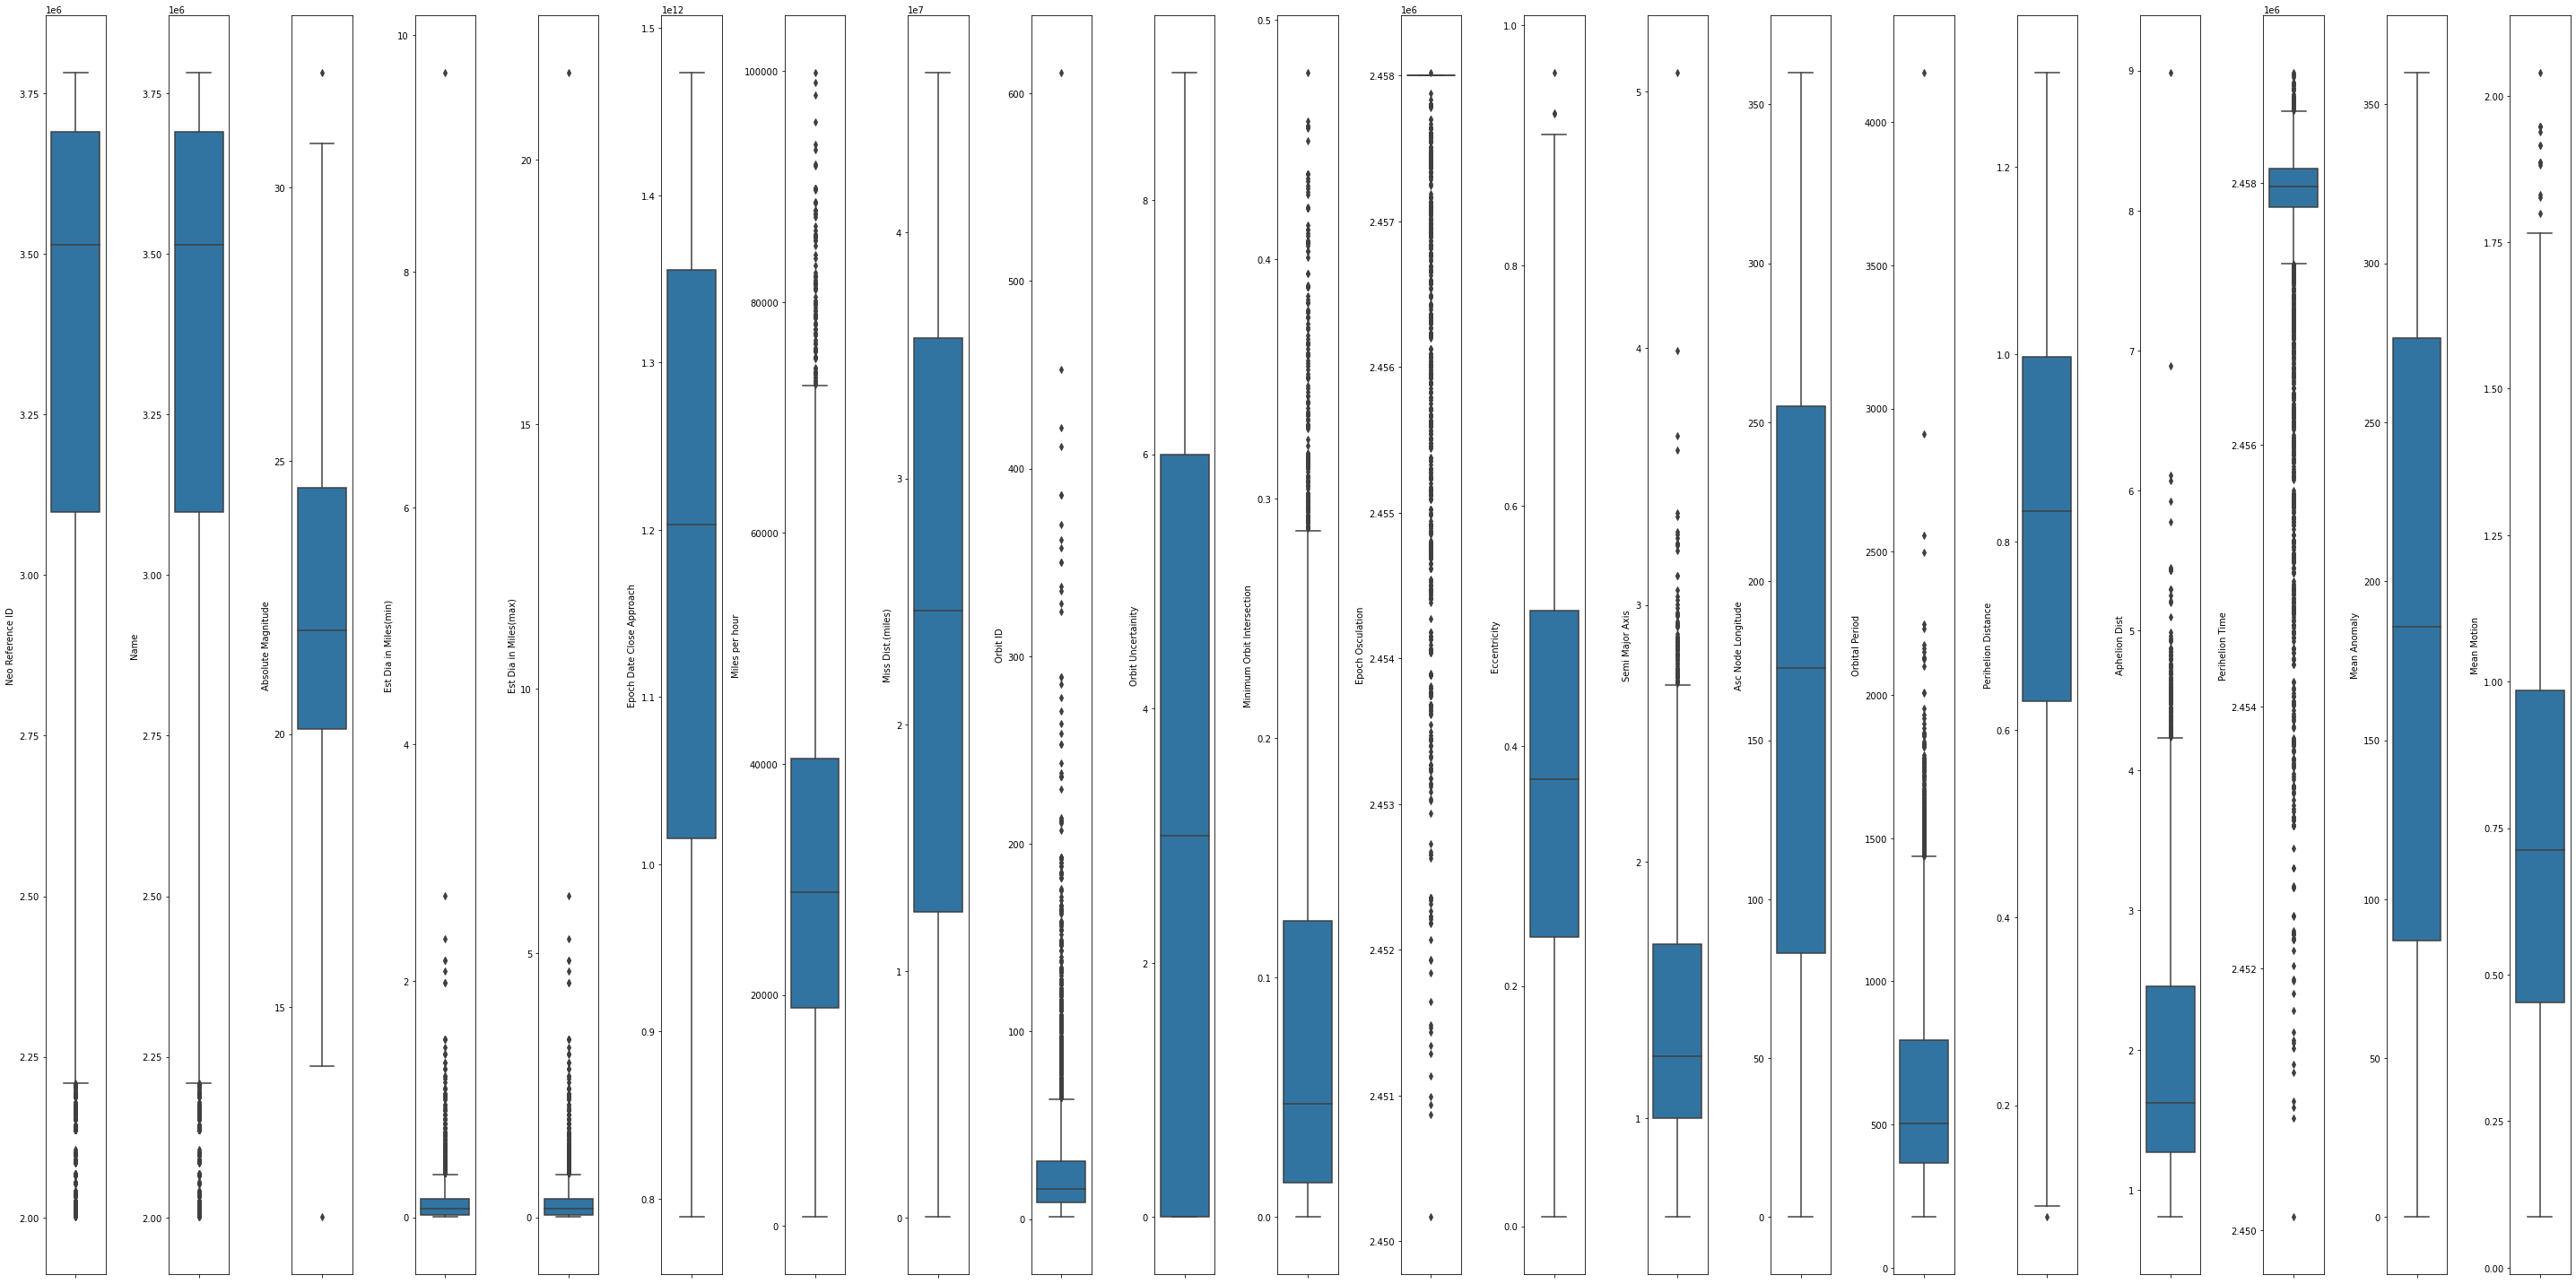

In [16]:
# check the outliers
df = nasa_df_num
l = df.columns.values
num_cols = len(l)
plt.figure(figsize=(40,20))
for i in range(0,len(l)):
    plt.subplot(1,num_cols,i+1)
    sns.boxplot(y=df[l[i]])
    plt.tight_layout()

* 16 out of 21 variables show outliers.
* The 5 variables with no outliers are 'Epoch Date Close Approach', 'Miss Dist.(miles)', 'Orbit Uncertainity', 'Asc Node Longitude', and 'Mean Anomaly'.

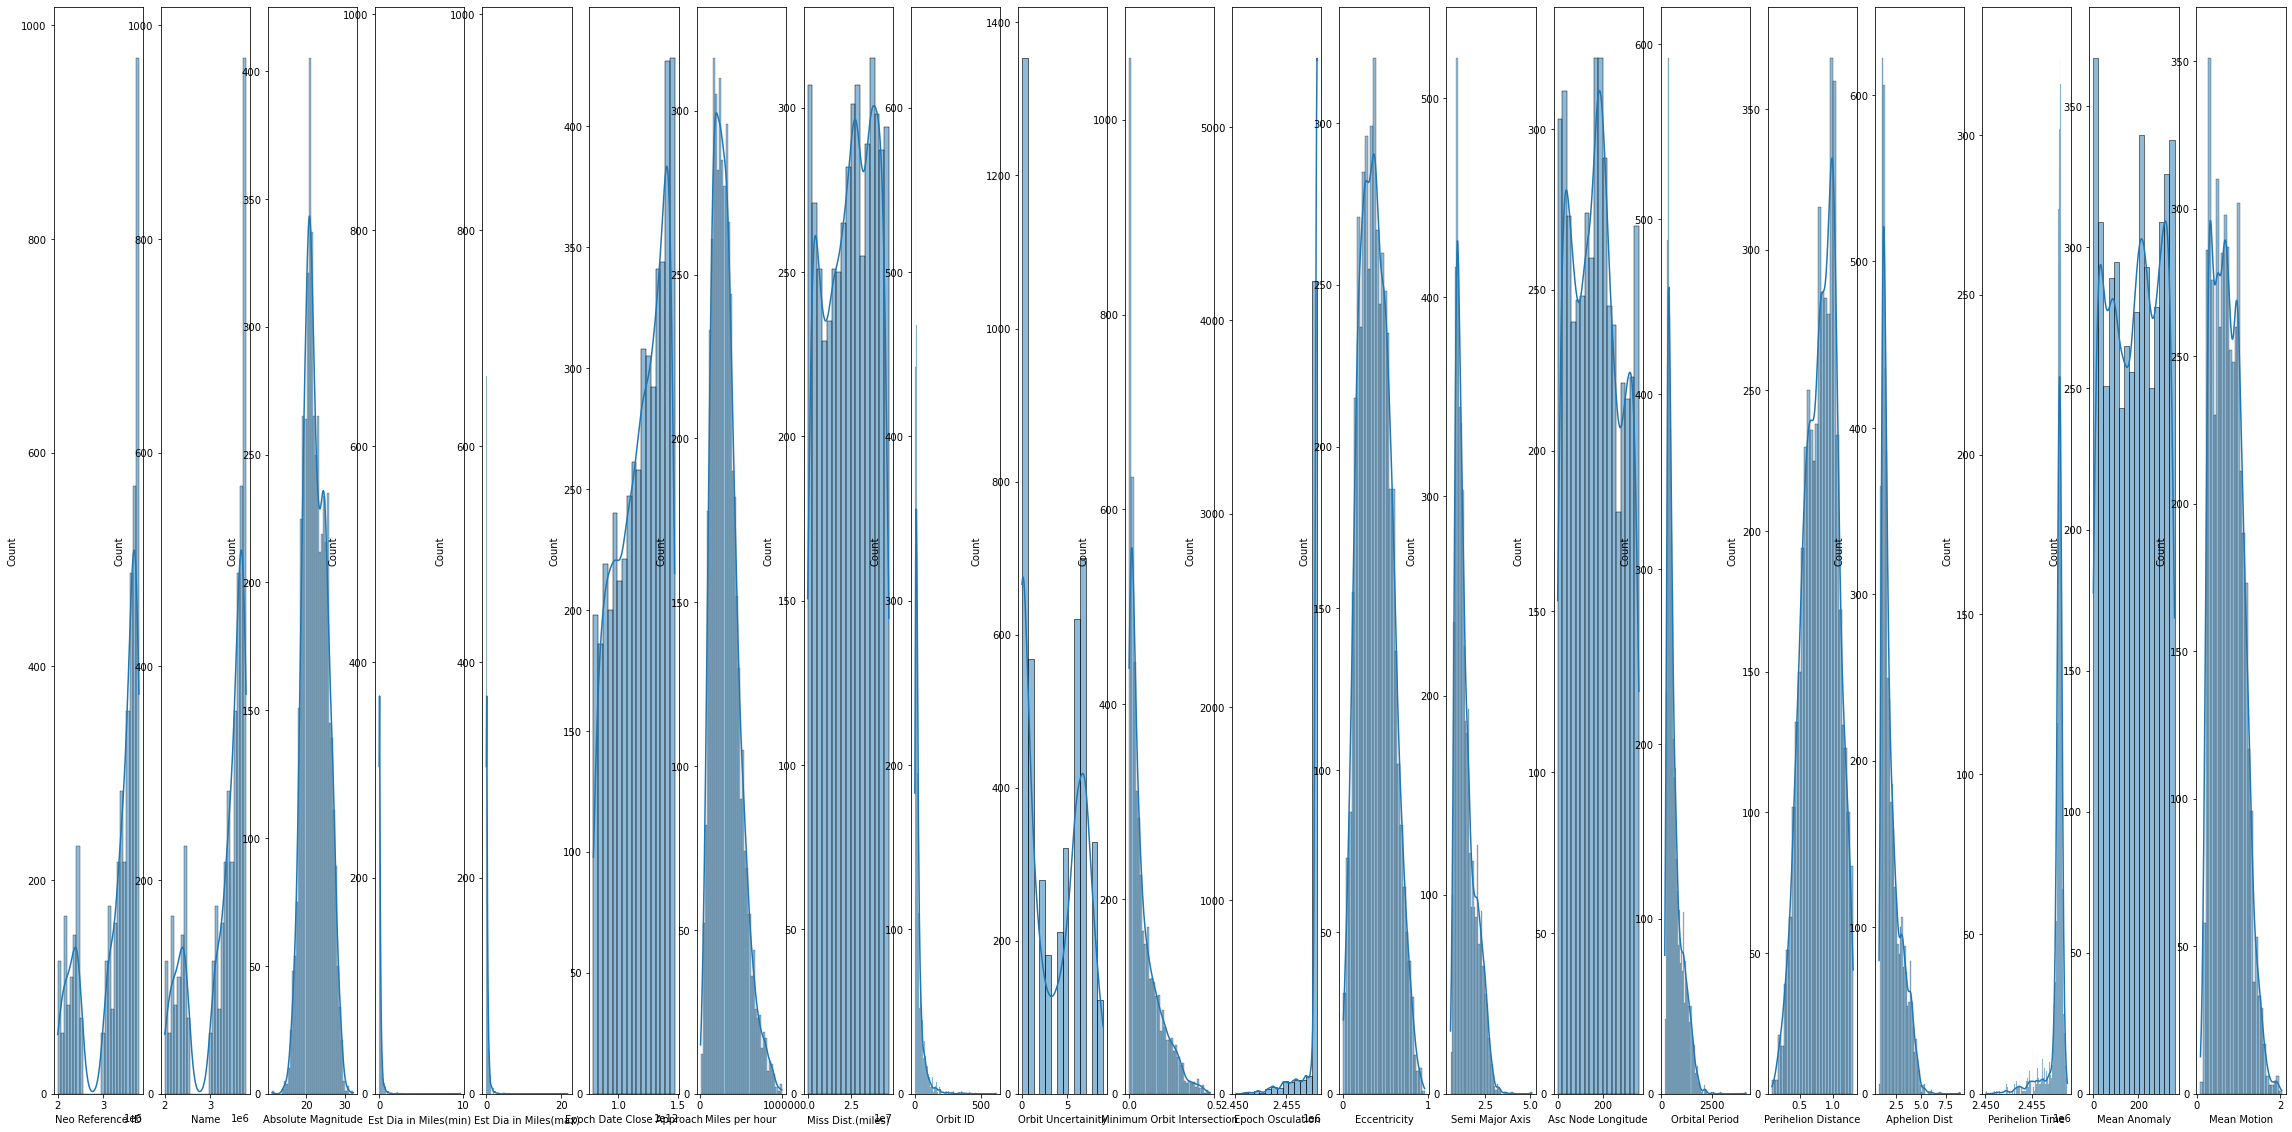

In [17]:
# Check the asymmetry of the probability distribution
plt.figure(figsize=(40,20))
for i in range(0,len(l)):
    plt.subplot(1,num_cols,i+1)
    sns.histplot(df[l[i]],kde=True) 

* 'Absolute Magnitude' seems to be normally distributed.

In [18]:
for i in range(0,len(l)):
    skewness = round(stats.skew(df[l[i]]),4)
    print('The skewness of \'%s\' is %f.' % (l[i],skewness))

The skewness of 'Neo Reference ID' is -1.102200.
The skewness of 'Name' is -1.102200.
The skewness of 'Absolute Magnitude' is 0.193900.
The skewness of 'Est Dia in Miles(min)' is 17.664500.
The skewness of 'Est Dia in Miles(max)' is 17.664500.
The skewness of 'Epoch Date Close Approach' is -0.294900.
The skewness of 'Miles per hour' is 0.887600.
The skewness of 'Miss Dist.(miles)' is -0.102400.
The skewness of 'Orbit ID' is 4.844800.
The skewness of 'Orbit Uncertainity' is 0.154700.
The skewness of 'Minimum Orbit Intersection' is 1.474500.
The skewness of 'Epoch Osculation' is -4.031100.
The skewness of 'Eccentricity' is 0.297300.
The skewness of 'Semi Major Axis' is 1.109600.
The skewness of 'Asc Node Longitude' is 0.087300.
The skewness of 'Orbital Period' is 1.527600.
The skewness of 'Perihelion Distance' is -0.261300.
The skewness of 'Aphelion Dist' is 1.305700.
The skewness of 'Perihelion Time' is -3.723900.
The skewness of 'Mean Anomaly' is -0.034600.
The skewness of 'Mean Motion

In [19]:
#print(nasa_df["Hazardous"])
#boolean Hazardous column 
nasa_df1 = nasa_df[nasa_df["Hazardous"] == True] #filter by hazardous = True
nasa_df1

#idk if we need this, might also need to get rid of redundant


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Orbiting Body,...,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.079051,0.176763,1995-01-01,788947200000,13680.509944,38993336.0,Earth,...,1.407011,314.373913,609.599786,0.808259,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
2,2446862,2446862,20.3,0.143849,0.321655,1995-01-08,789552000000,16979.661798,4736657.5,Earth,...,1.458824,259.475979,643.580228,0.950791,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
4,3514799,3514799,21.6,0.079051,0.176763,1995-01-15,790156800000,22012.954985,37910368.0,Earth,...,1.225615,84.629307,495.597821,0.967687,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
9,2306383,2306383,21.5,0.082776,0.185093,1995-01-22,790761600000,28855.136987,14111226.0,Earth,...,0.876125,2.613682,299.535161,0.393040,1.359211,2.457901e+06,119.861382,1.201862,J2000,True
22,3005973,3005973,21.7,0.075493,0.168807,1995-02-22,793440000000,63570.358787,4512202.5,Earth,...,0.906734,342.784208,315.368341,0.119309,1.694158,2.453598e+06,303.979299,1.141522,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,3744785,3744785,19.3,0.227985,0.509790,2016-08-08,1470639600000,51596.244460,5420135.5,Earth,...,1.647586,138.565536,772.450559,0.700571,2.594602,2.458331e+06,205.762131,0.466049,J2000,True
4663,3755345,3755345,21.5,0.082776,0.185093,2016-08-08,1470639600000,33004.316467,11229848.0,Earth,...,1.037464,136.762870,385.973723,0.938903,1.136024,2.457848e+06,142.264753,0.932706,J2000,True
4665,2333578,2333578,20.2,0.150628,0.336815,2016-08-15,1471244400000,28235.041082,17621348.0,Earth,...,1.573764,169.500723,721.120395,0.980758,2.166770,2.457645e+06,177.326778,0.499223,J2000,True
4668,3475236,3475236,21.6,0.079051,0.176763,2016-08-15,1471244400000,38373.479006,36278652.0,Earth,...,1.439534,54.443592,630.857755,0.629932,2.249136,2.458240e+06,223.131665,0.570652,J2000,True


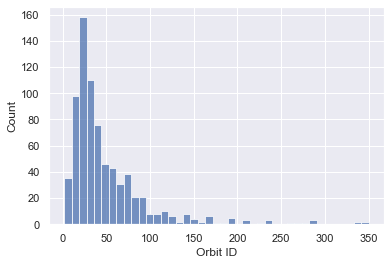

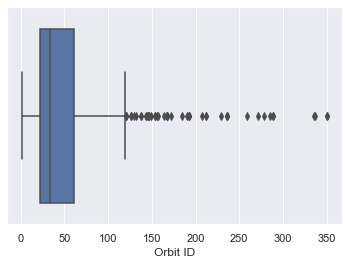

In [20]:
# plot of frequencies of each variable with true as hazardous
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=nasa_df1, x="Orbit ID")
plt.show()

#for true or hazardous asteroids, orbit ID near values 0-100?

ax = sns.boxplot(x=nasa_df1["Orbit ID"])
#or like interpret the boxplot

False    3932
True      755
Name: Hazardous, dtype: int64


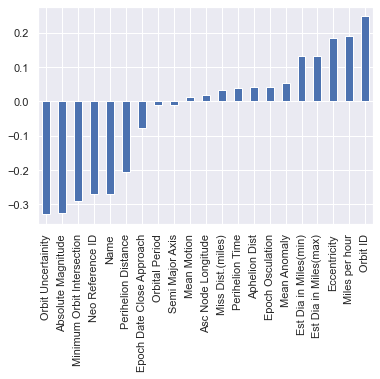

In [21]:
#count number of Hazardous vs not in dataset, see which one occurs more
print(nasa_df['Hazardous'].value_counts())
#histogram plot to see pairwise correlation with hazardous, get rid of hazardous correlation with itself
nasa_df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar') #sorted values in ascending
plt.show()
#print(nasa_df.corr()['Hazardous'][:-1])
#print(nasa_df.corr()['Hazardous'])

In [22]:
nasa_df['Equinox'].unique()

array(['J2000'], dtype=object)

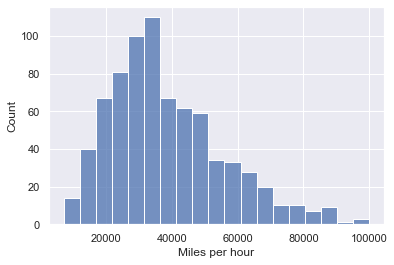

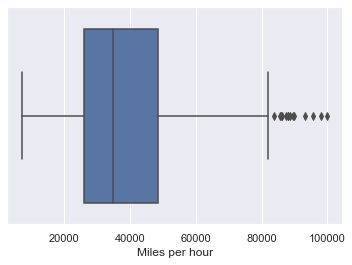

In [23]:
#More plots occurences of the variables '
# might want to do percentage/proportion of variables and proportion hazarard or not hazard
#contingency table for categorical variable'


#can use frequency table showing varibales after filtering true 
#ggplot
#contingency table, can do odds ratio, risk comparison
sns.histplot(data=nasa_df1, x="Miles per hour")
plt.show()
ax = sns.boxplot(x=nasa_df1["Miles per hour"])

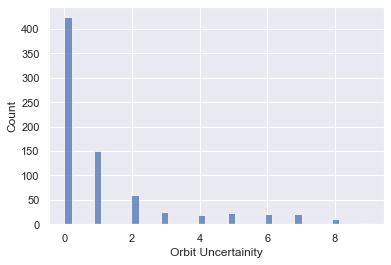

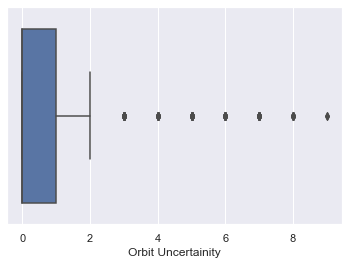

In [24]:
sns.histplot(data=nasa_df1, x="Orbit Uncertainity")
plt.show()
ax = sns.boxplot(x=nasa_df1["Orbit Uncertainity"])

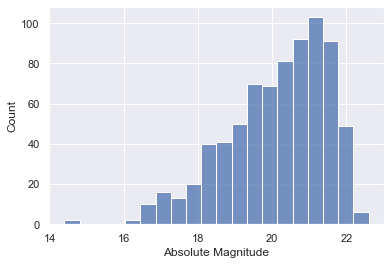

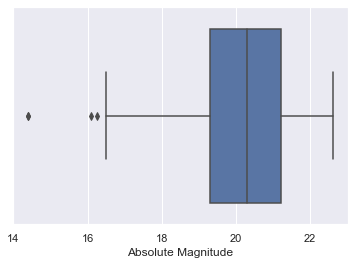

In [25]:
sns.histplot(data=nasa_df1, x="Absolute Magnitude")
plt.show()
ax = sns.boxplot(x=nasa_df1["Absolute Magnitude"])

### Hierarchical Clustering

In [26]:
#using the same dataset that we used for the Machine Learning models
my_data = nasa_df[['Orbit Uncertainity', 'Miles per hour', 'Absolute Magnitude', 'Hazardous']].copy()
my_data

,Orbit Uncertainity,Miles per hour,Absolute Magnitude,Hazardous
0,5,13680.509944,21.600,True
1,3,40519.173105,21.300,False
2,0,16979.661798,20.300,True
3,6,24994.839864,27.400,False
4,1,22012.954985,21.600,True
...,...,...,...,...
4682,8,49556.875548,23.900,False
4683,6,7214.337772,28.200,False
4684,6,16086.983633,22.700,False
4685,5,25393.489071,21.800,False


* This dataset has four colunms: Orbit ID, Miles per hour, Eccentricity, and Hazardous.
* We remove Orbit ID and Hazardous columns to view the results in 2D feature space.

In [27]:
data = my_data.iloc[:,1:3].values

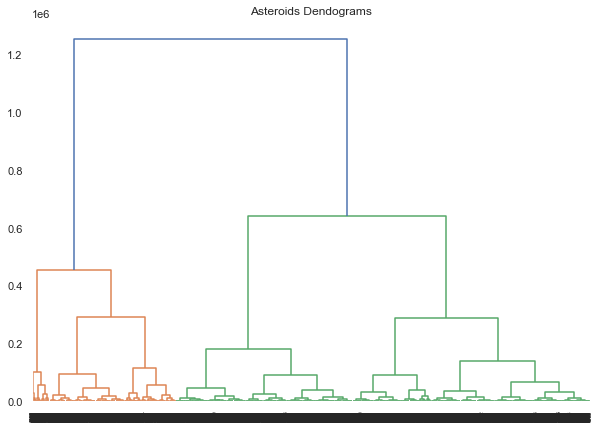

In [28]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Asteroids Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [29]:
from sklearn.cluster import AgglomerativeClustering

HCward = AgglomerativeClustering(n_clusters=4, linkage='ward')
HCward.fit_predict(data)

array([1, 0, 1, ..., 1, 1, 3])

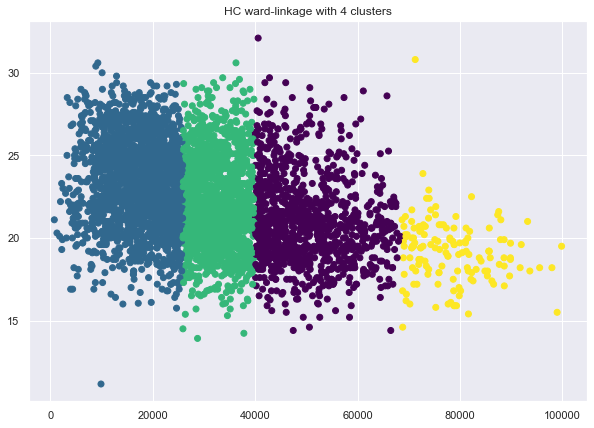

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=HCward.labels_, cmap='viridis')
plt.title('HC ward-linkage with 4 clusters')
plt.show()

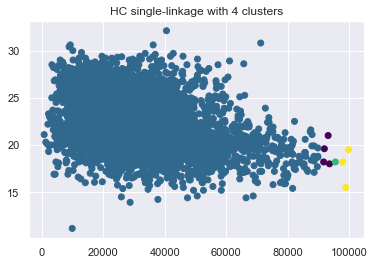

In [31]:
HCsingle=AgglomerativeClustering(n_clusters=4, linkage='single')
HCsingle.fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=HCsingle.labels_, cmap='viridis')
plt.title('HC single-linkage with 4 clusters')
plt.show()

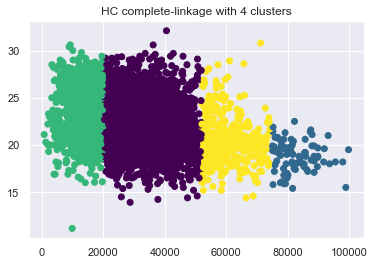

In [32]:
HCcomplete=AgglomerativeClustering(n_clusters=4, linkage='complete')
HCcomplete.fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=HCcomplete.labels_, cmap='viridis')
plt.title('HC complete-linkage with 4 clusters')
plt.show()

## MACHINE LEARNING MODELS

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [34]:
X=np.asarray(my_data[['Orbit Uncertainity', 'Miles per hour', 'Absolute Magnitude', 'Hazardous']])
Y=my_data['Hazardous']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

### Multi-Layer Perceptron (MLP)

In [35]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

param_grid_mlp = {
    'hidden_layer_sizes': [5,10,15,(5,5),(5,10),(100,15),(100,)],
    'activation': ['relu', 'sigmoid'],
    'solver': ['adam'],
    'alpha': [5e-4, 1e-4, 0.005, 0.001],
    'max_iter':[300,500]
}

X=np.asarray(my_data[['Orbit Uncertainity', 'Miles per hour', 'Absolute Magnitude', 'Hazardous']])
Y=my_data['Hazardous']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

gridSearch_data1 = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=cv,
                         scoring='accuracy', verbose=2, n_jobs=-1)
gridSearch_data1.fit(X_train, Y_train)
print('Score: ', gridSearch_data1.best_score_)
print('Parameters: ', gridSearch_data1.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Score:  0.8400000000000001
Parameters:  {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 10, 'max_iter': 300, 'solver': 'adam'}


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82881517 0.83146919 0.84       0.83829384 0.83924171 0.6092891
 0.70218009 0.62369668 0.55507109 0.83829384 0.84       0.7163981
 0.76511848 0.83374408 0.70767773 0.81763033 0.42957346 0.42521327
 0.71601896 0.77800948 0.58028436 0.55563981 0.83791469 0.66218009
 0.84       0.84       0.75393365 0.83033175 0.83886256 0.80227488
 0.82104265 0.82805687 0.7636019  0.72265403 0.84       0.84
 0.69630332 0.69137441 0.70236967 0.56436019 0.70957346 0.7236019
 0.55829384 0.57364929 0.83753555 0.83905213 0.82597156 0.73611374
 0.84       0.69308057 0.70236967 0.82976303 0.70900474 0.70312796
 0.84       0.7014218         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

### K-Neighbors

In [37]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

param_grid = {
    'n_neighbors': [3, 5,7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)
gridSearch.fit(X_train, Y_train)

print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Score:  0.8288151658767774
Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


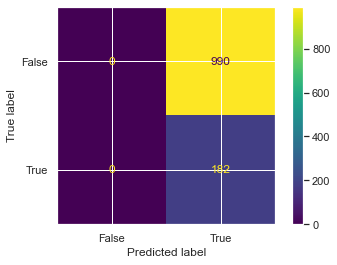

In [38]:

plot_confusion_matrix(gridSearch_data1, X_test, Y_test)  


#### 

### Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
#nb_model = clf.fit(X_train,y_train)
#print("Accuracy of Naive Bayes of test set:",nb_model.score(X_test,y_test))
#print("Accuracy of Naive Bayes of train set:",nb_model.score(X_train,y_train))

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

param_grid = {
    'var_smoothing': [1e-9, 1e-7],
}

gridSearch = GridSearchCV(GaussianNB(), param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)
gridSearch.fit(X_train, Y_train)

print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Score:  0.9759241706161138
Parameters:  {'var_smoothing': 1e-09}


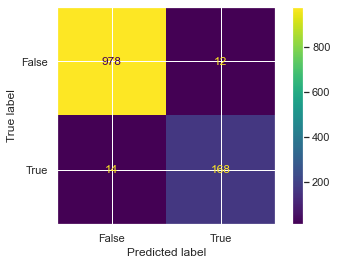

In [40]:
plot_confusion_matrix(gridSearch, X_test, Y_test)  

### SVM

In [42]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
svm_model = clf.fit(X_train,Y_train)
print("Accuracy of SVM of test set:",svm_model.score(X_test,Y_test))
#print("Accuracy of Decision Tree of train set:",svm_model.score(X_train,Y_train))


Accuracy of SVM of test set: 0.8447098976109215


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
lg_model = clf.fit(X_train, Y_train)
#rint("Accuracy of train:",lg_model.score(X_train,y_train))
print("Accuracy of test:",lg_model.score(X_test,Y_test))



Accuracy of test: 0.8387372013651877
